In [2]:
import sys
import datacube
import numpy as np
import seaborn as sns
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
from datacube.utils import geometry
from datacube.utils.geometry import CRS
from datacube.helpers import write_geotiff
import os


In [43]:
Snow_phen2016_2018=pd.read_csv('results/threshold_02/mask/phen/1200/2016_2018_phenology.csv')
Snow_phen2014_2015=pd.read_csv('results/threshold_02/mask/phen/1200/2014_2015_phenology.csv')
Snow_phen2012_2013=pd.read_csv('results/threshold_02/mask/phen/1200/2012_2013_phenology.csv')
Snow_phen2010_2011=pd.read_csv('results/threshold_02/mask/phen/1200/2010_2011_phenology.csv')

Snow_phen2010_2018=pd.concat([Snow_phen2010_2011, Snow_phen2012_2013, Snow_phen2014_2015,Snow_phen2016_2018])

In [44]:
Snow_phen2008_2009=pd.read_csv('results/threshold_02/mask/phen/1200/2008_2009_phenology.csv')
Snow_phen2006_2007=pd.read_csv('results/threshold_02/mask/phen/1200/2006_2007_phenology.csv')
Snow_phen2004_2005=pd.read_csv('results/threshold_02/mask/phen/1200/2004_2005_phenology.csv')
Snow_phen2002_2003=pd.read_csv('results/threshold_02/mask/phen/1200/2002_2003_phenology.csv')
Snow_phen2000_2001=pd.read_csv('results/threshold_02/mask/phen/1200/2000_2001_phenology.csv')

Snow_phen2000_2009=pd.concat([Snow_phen2000_2001, Snow_phen2002_2003, Snow_phen2004_2005, Snow_phen2006_2007, Snow_phen2008_2009])

In [54]:
Snow_phen1998_1999=pd.read_csv('results/threshold_02/mask/phen/1200/1998_1999_phenology.csv')
Snow_phen1996_1997=pd.read_csv('results/threshold_02/mask/phen/1200/1996_1997_phenology.csv')
Snow_phen1994_1995=pd.read_csv('results/threshold_02/mask/phen/1200/1994_1995_phenology.csv')
Snow_phen1992_1993=pd.read_csv('results/threshold_02/mask/phen/1200/1992_1993_phenology.csv')
Snow_phen1990_1991=pd.read_csv('results/threshold_02/mask/phen/1200/1990_1991_phenology.csv')

Snow_phen1987_1989=pd.read_csv('results/threshold_02/mask/phen/1200/1987_1989_phenology.csv')

Snow_phen1990_1999=pd.concat([
    Snow_phen1990_1991, 
    Snow_phen1992_1993, 
    Snow_phen1994_1995,
    Snow_phen1996_1997,
    Snow_phen1998_1999
])

In [57]:
# Snow_phen2016_2018
snow_phen=[(Snow_phen2010_2018,2010), (Snow_phen2000_2009, 2000), (Snow_phen1990_1999, 1990),
           (Snow_phen1987_1989, 1980)
          ]
Snow_phen_all=pd.concat([
    Snow_phen1987_1989, 
    Snow_phen1990_1999, Snow_phen2000_2009, Snow_phen2010_2018])
Snow_phen_all.to_csv('phenology_1200_all.csv')

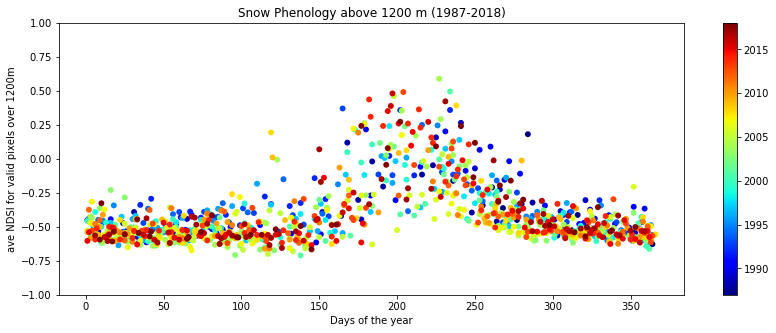

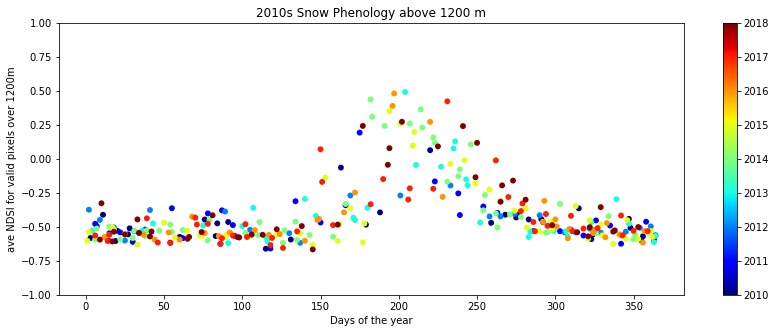

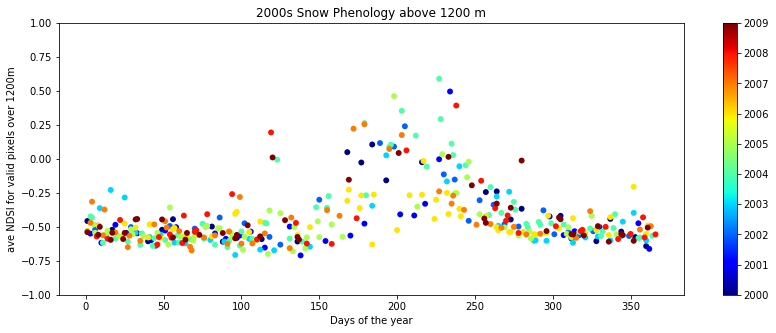

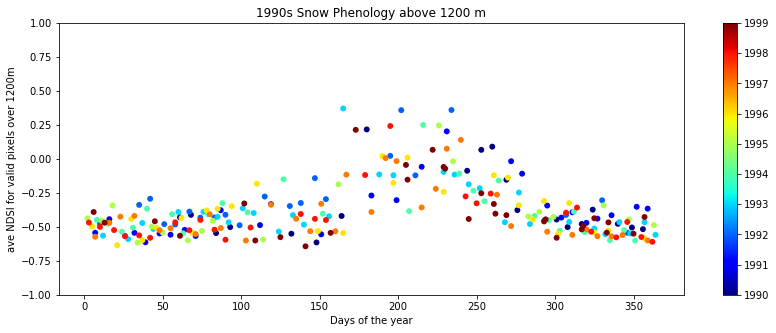

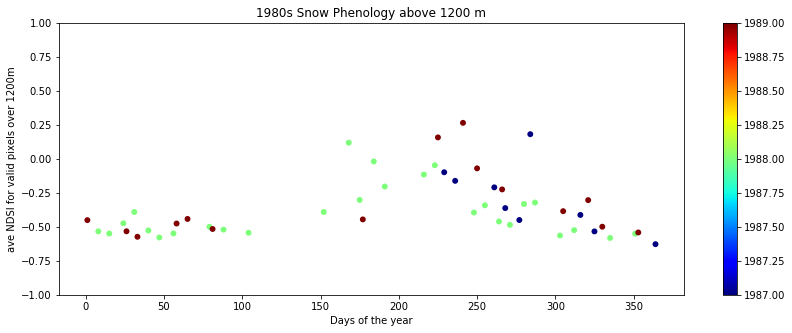

In [56]:
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf
pdf = matplotlib.backends.backend_pdf.PdfPages("phenology_NSW_1200.pdf")


fig, ax = plt.subplots(figsize=(14,5))
#     pdf = matplotlib.backends.backend_pdf.PdfPages("phenology_NSW.pdf")
sp = ax.scatter(Snow_phen_all['dayofyear'], #ndsi_ds.values, 
                Snow_phen_all['average_ndsi'], c=Snow_phen_all['year'],
                cmap='jet', marker='o', edgecolor='none',s=35)
plt.ylim(-1, 1)
plt.title('Snow Phenology above 1200 m (1987-2018)')
plt.xlabel('Days of the year')
plt.ylabel('ave NDSI for valid pixels over 1200m')
fig.colorbar(sp)
pdf.savefig()


for i, j in snow_phen:
    fig, ax = plt.subplots(figsize=(14,5))
#     pdf = matplotlib.backends.backend_pdf.PdfPages("phenology_NSW.pdf")
    sp = ax.scatter(i['dayofyear'], #ndsi_ds.values, 
                    i['average_ndsi'], c=i['year'],
                    cmap='jet', marker='o', edgecolor='none',s=35)
    plt.ylim(-1, 1)
    plt.title(str(j)+'s Snow Phenology above 1200 m')
    plt.xlabel('Days of the year')
    plt.ylabel('ave NDSI for valid pixels over 1200m')
    fig.colorbar(sp)
    pdf.savefig()
pdf.close()
    

In [33]:
Snow_phen_all=pd.concat([
    Snow_phen1987_1989, 
    Snow_phen1990_1999, Snow_phen2000_2009,Snow_phen2010_2018])

# snow_phen=[(Snow_phen2010_2018,2010),
#            (Snow_phen2000_2009, 2000), 
#            (Snow_phen1990_1999, 1990),
#            (Snow_phen1987_1989, 1980)
#           ]

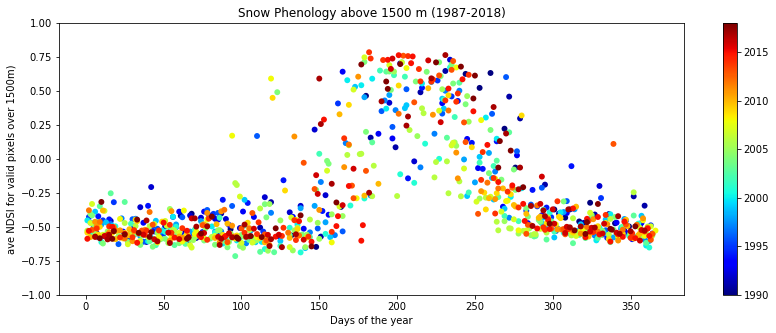

In [34]:
pdf = matplotlib.backends.backend_pdf.PdfPages("phenology_NSW_all.pdf")

fig, ax = plt.subplots(figsize=(14,5))
#     pdf = matplotlib.backends.backend_pdf.PdfPages("phenology_NSW.pdf")
sp = ax.scatter(Snow_phen_all['dayofyear'], #ndsi_ds.values, 
                Snow_phen_all['average_ndsi'], c=Snow_phen_all['year'],
                cmap='jet', marker='o', edgecolor='none',s=35)
plt.ylim(-1, 1)
plt.title('Snow Phenology above 1500 m (1987-2018)')
plt.xlabel('Days of the year')
plt.ylabel('ave NDSI for valid pixels over 1500m)')
fig.colorbar(sp)
pdf.savefig()
pdf.close()

In [62]:
for grp, ok in Snow_phen2016_2018.groupby(['year']):
    ax = grp.plot(ax=ax, kind='line', x='dayofyear', y='average_ndsi')
plt.legend()
plt.show()

TypeError: float() argument must be a string or a number, not 'DataFrameGroupBy'

Text(0.5, 1.0, '2010s Snow Phenology aboove 1800 m')

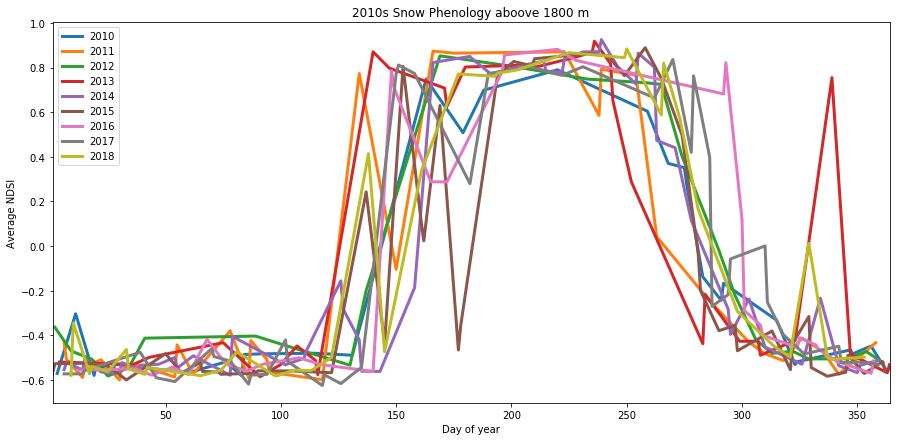

In [81]:
fig, ax = plt.subplots(figsize=(15,7))
Snow_phen2010_2018.groupby(['year']).plot(x='dayofyear', y='average_ndsi',ax=ax, linewidth=3)
plt.legend([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018])
plt.xlabel('Day of year')
plt.ylabel('Average NDSI')
plt.title('2010s Snow Phenology aboove 1800 m')


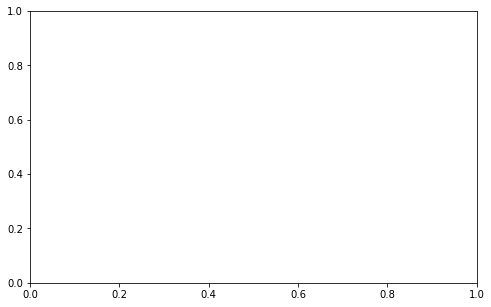

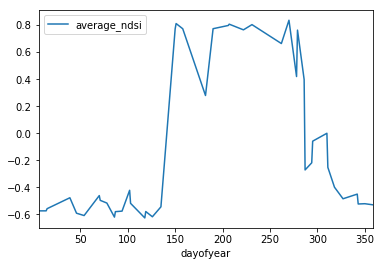

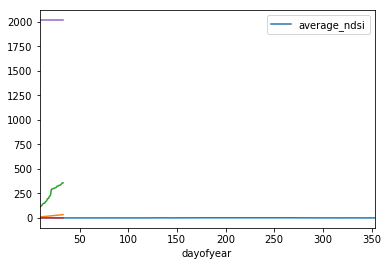

In [52]:
fig, ax = plt.subplots(figsize=(8,5))

a = Snow_phen2016_2018.loc[Snow_phen2016_2018['year']==2016].plot(x='dayofyear', y='average_ndsi')
b = Snow_phen2016_2018.loc[Snow_phen2016_2018['year']==2017].plot(x='dayofyear', y='average_ndsi')
c = Snow_phen2016_2018.loc[Snow_phen2016_2018['year']==2018].plot(x='dayofyear', y='average_ndsi')

plt.plot(a)

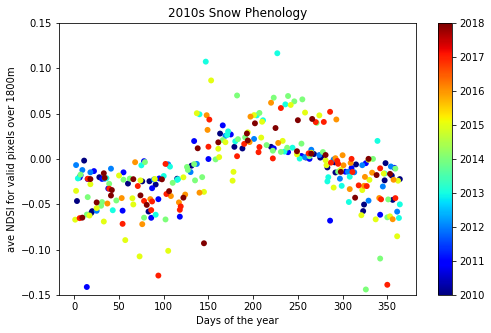

In [63]:
fig, ax = plt.subplots(figsize=(8,5))

for i, j in snow_phen
sp = ax.scatter(Snow_phen2010_2018['dayofyear'], #ndsi_ds.values, 
                Snow_phen2010_2018['average_ndsi'], c=Snow_phen2010_2018['year'],
                cmap='jet', marker='o', edgecolor='none',s=35)
plt.ylim(-0.15, 0.15)
plt.title('2010s Snow Phenology')
plt.xlabel('Days of the year')
plt.ylabel('ave NDSI for valid pixels over 1800m')
fig.colorbar(sp)

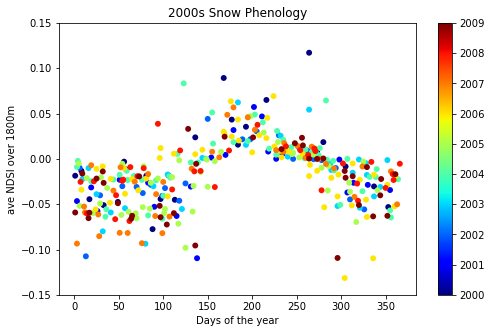

In [67]:
fig, ax = plt.subplots(figsize=(8,5))

sp = ax.scatter(Snow_phen2000_2009['dayofyear'], #ndsi_ds.values, 
                Snow_phen2000_2009['average_ndsi'], c=Snow_phen2000_2009['year'],
                cmap='jet', marker='o', edgecolor='none',s=35)
plt.ylim(-0.15, 0.15)
plt.title('2000s Snow Phenology')
plt.xlabel('Days of the year')
plt.ylabel('ave NDSI over 1800m')
fig.colorbar(sp)

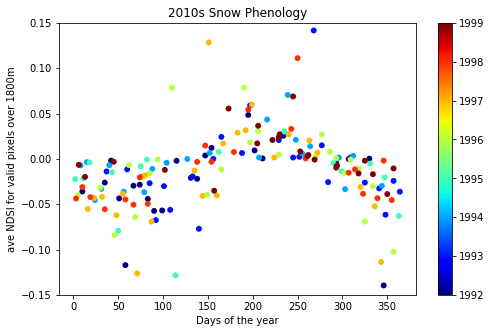

In [69]:
fig, ax = plt.subplots(figsize=(8,5))

sp = ax.scatter(Snow_phen1990_1999['dayofyear'], #ndsi_ds.values, 
                Snow_phen1990_1999['average_ndsi'], c=Snow_phen1990_1999['year'],
                cmap='jet', marker='o', edgecolor='none',s=35)
plt.ylim(-0.15, 0.15)
plt.title('2010s Snow Phenology')
plt.xlabel('Days of the year')
plt.ylabel('ave NDSI for valid pixels over 1800m')
fig.colorbar(sp)